<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-A01793506/blob/main/IBM2/Modulo_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MAESTRIA EN INTELIGENCIA ARTIFICIAL APLICADA

CIENCIA Y ANALITICA DE DATOS

CURSO IBM DATA ANALYSIS WITH PYTHON

NOMBRE: ERICK NAJERA OLIVERO

MATRICULA: A01793506

MODULO 4

Regresion Lineal Simple

Tipo de modelo de aprendizaje automatico donde se tiene una variable dependiente x y una variable dependiente y.

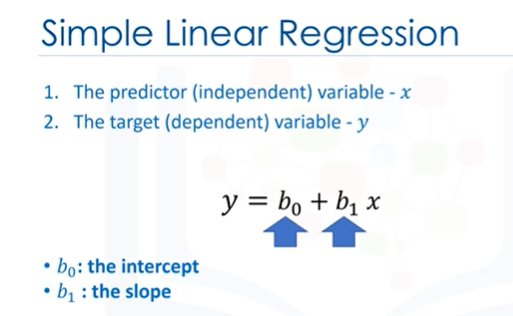

In [17]:
#Cargue de librerias y del conjunto de datos para prueba de los ejercicios
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from scipy.stats import pearsonr

url = 'https://raw.githubusercontent.com/tec03/Datasets/main/datasets/Cartwheeldata.csv'
df = pd.read_csv(url)

In [18]:
#Entrenar un modelo de Regresión lineal simple
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [19]:
# Se define la variable dependiente x del data frame, igua lse hace con la variable dependiente o target.
x = df[['Height']]
y = df[['Score']]

#por medio del metodo Fit se realiza entrenamiento con los respectivos parametros
lm.fit(x, y)

#Se usa el metodo Predict para realizar la prediccion de acuerdo a la variable de entrada
yhat = lm.predict(x)
yhat

lm.intercept_
lm.coef_

array([[-0.13994695]])

Regresión Lineal MUltiple

Modelo que establece una relacionentre una variable s salida y y dos o mas variables independientes x.

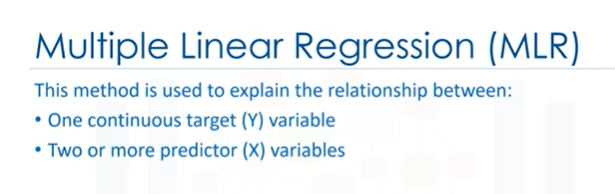

In [ ]:
#El modelo se entrena de la misma forma seleccionando las variables de entrada
df.head()
x = df[['Height','Wingspan','CWDistance']]
y = df[['Score']]
lm.fit(x, y) 

#De igual forma se obtiene la pediccion
yhat= lm.predict(x)
yhat

Evaluación de modelos usando visualización

Regresión Plot muestra una combinación de Scatterplot, donde cada punto se representa para un diferente y.  y la linea del modelo entrenado.

Podemos usarlos para obtener estimaciones de: 
* Relación entre dos variables 
* la fuerza de la correlación
* La dirección de la correlación (positiva o negativa)


(0.0, 10.5)

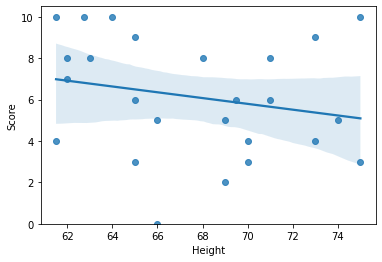

In [13]:
#El metodo recibe la varibale independiente y la varibale dependiente, tabien se indica el data frame.
import seaborn as sns
sns.regplot(x='Height', y='Score', data=df)
plt.ylim(0,)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


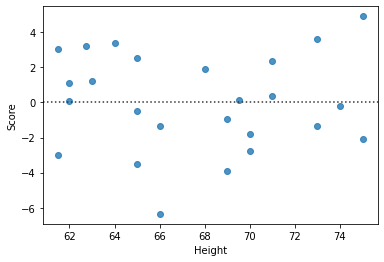

In [14]:
#Usamos el plot de reiduos para entender si es correcto la apreciacion del tipo de grafica y comportamiento de los datos
sns.residplot(df['Height'], df['Score'])
#Al observar curvatura se entiende que no es el tipo de modelo optimo 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


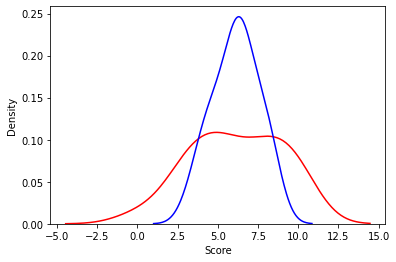

In [15]:
#Plot de distribucion, es recomendado para visualizar modelos con mas de una variable independiente
ax1 = sns.distplot(df['Score'], hist=False, color='r', label='Valor actual')
sns.distplot(yhat, hist=False, color='b', label='Valor entrenado', ax=ax1) 

Regresión Polinomica

Tipo de modelo utilizado cuando el entrenamiento no se ajusta a un modelo lineal, por loque generalmente son modelos de relaciones curvilineas.


In [ ]:
#Ejemplo en Python
#Usamos el metodo preprocessing para normalizar, estandarizar los datos con el fin de evitar errores al entrenar de forma polinomica
from sklearn.preprocessing import PolynomialFeatures
pr = PolynomialFeatures(degree=2, include_bias=False)
x_poly = pr.fit_transform(df[['Age','Wingspan']])
x_poly

from sklearn.preprocessing import StandardScaler
SCALE =  StandardScaler()
SCALE.fit(df[['Age','Wingspan']])
x_scale = SCALE.transform(df[['Age','Wingspan']]) 
x_scale

Pipeline

Por medio de pipelines podemos programar una secuencia de pasos al fin de obtener un modelo de aprensizaje automatico, Podemos normalizar los datos, escalar y alicar moodelo de regresion.

In [ ]:
#Se importa la libreria
from sklearn.pipeline import Pipeline
#Se agregan lso pasos, esto es nombre del paso y seguido del constructor
input = [('scale', StandardScaler()),('polynomial', PolynomialFeatures(degree=2)), ('model',LinearRegression())]
#Creamos el objeto Pipeline
pipe = Pipeline(input)
pipe.fit(df[['Age','Height']], df['Score'])



Evaluar modelo usando visualización

esto nos ayuda a dentificar que tan bueno es el modelo diseñado de acuerdo al comjunto de datos.

MSE (Mean squared error)
Rsq2





In [38]:
from sklearn.metrics import mean_squared_error

x = df[['Height']]
x = df[['Score']]
lm.fit(x, y)
mse = mean_squared_error(x, y)
mse
lm.score(x,y)


1.0